In [1]:
import pandas as pd
import numpy as np
import re 
import itertools
import ast

from collections import Counter

import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# Close up on Text Analysis

Now that we have multiple ways of analyzing the data lets check the results and visualize them.

## Reading the result data sets

In [3]:
nltk_scores = pd.read_csv('../data/results/nltk-scores')

In [4]:
flair_scores = pd.read_csv('../data/results/flair-scores')

In [5]:
ncrlex = pd.read_csv('../data/results/ncrlex-emotion-analysis')

In [6]:
album_trends = pd.read_csv('../data/results/album-thematics')

In [7]:
data = pd.concat([nltk_scores,flair_scores['flair_score'],ncrlex['ncrlex_emotions']],axis=1)

In [8]:
data

,album,song,words,joined_words,nltk_score,flair_score,ncrlex_emotions
0,11.TTPD,HowDidItEnd,"['hereby', 'conduct', 'postmortem', 'hot', 'ho...",hereby conduct postmortem hot house flower out...,1,0,"['negative', 'surprise', 'sadness', 'anger', '..."
1,11.TTPD,TheBolter,"['account', 'almost', 'drowned', 'six', 'frigi...",account almost drowned six frigid water confir...,1,0,"['negative', 'positive', 'anticipation', 'joy'..."
2,11.TTPD,Peter,"['forgive', 'peter', 'lost', 'fearless', 'lead...",forgive peter lost fearless leader closet like...,1,0,"['positive', 'trust', 'joy', 'anticipation', '..."
3,11.TTPD,imgonnagetyouback,"['lilac', 'short', 'skirt', 'one', 'fit', 'lik...",lilac short skirt one fit like skin research k...,1,0,"['negative', 'fear', 'sadness', 'positive', 'a..."
4,11.TTPD,DownBad,"['really', 'beam', 'cloud', 'sparkling', 'dust...",really beam cloud sparkling dust experiment te...,0,0,"['negative', 'sadness', 'positive', 'fear', 'd..."
...,...,...,...,...,...,...,...
237,7.Lover,MissAmericanaTheHeartbreakPrince,"['know', 'adore', ""i'm"", 'crazier', '16', 'los...",know adore i'm crazier 16 lost film scene wavi...,0,0,"['negative', 'sadness', 'fear', 'anger', 'disg..."
238,7.Lover,CruelSummer,"['fever', 'dream', 'high', 'quiet', 'night', '...",fever dream high quiet night know caught oh ri...,0,0,"['fear', 'positive', 'negative', 'sadness', 'a..."
239,7.Lover,LondonBoy,"['go', ""drivin'"", 'scooter', 'uh', 'know', ""'r...",go drivin' scooter uh know 'round london oh i'...,1,1,"['positive', 'joy', 'trust', 'negative', 'anti..."
240,7.Lover,FalseGod,"['crazy', 'think', 'crazy', 'think', 'could', ...",crazy think crazy think could work remember sa...,1,1,"['positive', 'joy', 'anticipation', 'fear', 't..."


## Comparing scores

### NLTK Results

In [9]:
mean_nlt_score_by_album = data.groupby('album')['nltk_score'].mean().reset_index().sort_values(by='album',
                                                    key=lambda x: x.apply(lambda s: int(re.search(r"(\d+)\.", s).group(1))))

In [10]:
mean_nlt_score_by_album

,album,nltk_score
0,1.TaylorSwift,0.875000
3,2.Fearless,0.814815
4,3.SpeakNow,0.708333
5,4.Red,0.866667
6,5.1989,0.565217
7,6.Reputation,0.888889
8,7.Lover,0.666667
9,8.Folklore,0.588235
10,9.Evermore,0.666667
1,10.Midnights,0.650000


In [11]:
album_colors = ['#A5C9A5','#EFC180','#C7A8CB','#7A2E39','#B5E5F8','#746F70','#F7B0CC','#CDC9C1','#C5AC90','#242E47','#231e1a']

In [12]:
def plot_album_trends(x, y, colors, title="", xlabel="", ylabel=""):
    plt.figure(figsize=(8,6))

    plt.bar(x,y, color =colors)

    plt.xticks(rotation=45,fontsize=10,ha='right')

    plt.title(title)
    plt.ylabel(ylabel)

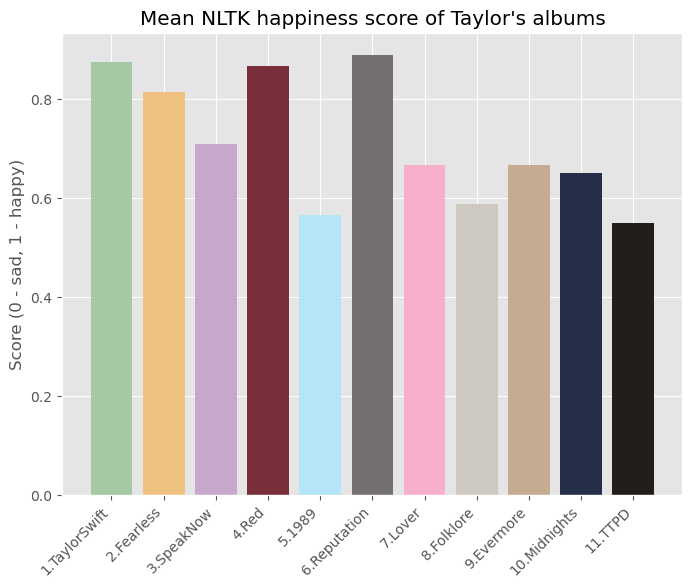

In [13]:
plot_album_trends(
    mean_nlt_score_by_album.album,
    mean_nlt_score_by_album.nltk_score,
    album_colors,
    title = 'Mean NLTK happiness score of Taylor\'s albums',
    ylabel = 'Score (0 - sad, 1 - happy)',
    )

plt.savefig('../data/images/mean-nltk-scores')

plt.show()

The NLTK model has shown rather optimistic an optimistic trand for the mood of each album. Which is not very far from the truth but not close either.  Lets see what the flair model has to say about that.

### Flair Results

In [14]:
mean_flair_score_by_album = data.groupby('album')['flair_score'].mean().reset_index().sort_values(by='album',
                                                    key=lambda x: x.apply(lambda s: int(re.search(r"(\d+)\.", s).group(1))))

In [15]:
mean_flair_score_by_album

,album,flair_score
0,1.TaylorSwift,0.250000
3,2.Fearless,0.259259
4,3.SpeakNow,0.166667
5,4.Red,0.266667
6,5.1989,0.130435
7,6.Reputation,0.166667
8,7.Lover,0.166667
9,8.Folklore,0.058824
10,9.Evermore,0.111111
1,10.Midnights,0.100000


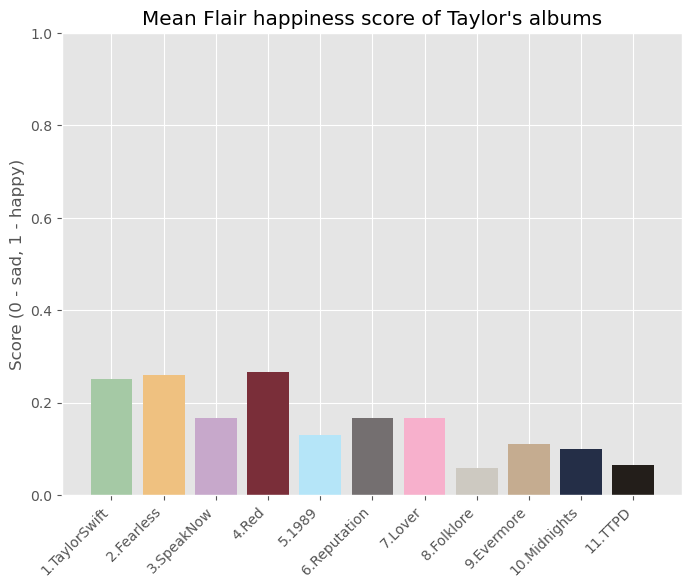

In [16]:
plot_album_trends(
    mean_flair_score_by_album.album,
    mean_flair_score_by_album.flair_score,
    album_colors,
    'Mean Flair happiness score of Taylor\'s albums',
    ylabel = "Score (0 - sad, 1 - happy)"
)

plt.ylim(0.0,1.0)

plt.savefig('../data/images/mean-flari-scores')

plt.show()

In contrast to NLTK model the Flair one is giving a rather pesemistic overall trend. Albums won't surpass even 0.4 on the happyness scale.

One thing however both algorithms do agree on is that Red, the fourth album, has the highest sentiment value.

## Emotions and Influential Words

We have two very different opinions for the album sentiment from both of the models. But our work is not done yet. Apart from sentiment we have also extracted the predominant emotions and most influential words for each album. Let's have a look there and we might be albe to determine which of the models is more accurate.

### Emotions

In [17]:
def flatten_list_of_strings(list_of_strings):
    """Flattens a list of strings representing lists into a single list of strings."""
    return list(itertools.chain.from_iterable(ast.literal_eval(s) for s in list_of_strings))

In [18]:
def reduce_dim(emotions):
    return emotions.explode()

In [19]:
album_emotions = ncrlex.groupby('album').aggregate({'ncrlex_emotions':flatten_list_of_strings}).reset_index().sort_values(by='album', key=
                                                                                           lambda x: x.apply(lambda s: int(re.search(r"(\d+)\.", s).group(1))))

In [20]:
album_emotions.reset_index(drop=True,inplace=True)

In [21]:
album_emotions

,album,ncrlex_emotions
0,1.TaylorSwift,"[negative, fear, anger, sadness, anticipation,..."
1,2.Fearless,"[negative, anger, positive, joy, trust, disgus..."
2,3.SpeakNow,"[positive, joy, trust, anticipation, surprise,..."
3,4.Red,"[anticipation, negative, positive, fear, trust..."
4,5.1989,"[positive, anticipation, joy, negative, sadnes..."
5,6.Reputation,"[positive, joy, anticipation, trust, surprise,..."
6,7.Lover,"[positive, trust, joy, negative, anticipation,..."
7,8.Folklore,"[negative, sadness, positive, anticipation, fe..."
8,9.Evermore,"[positive, negative, trust, joy, anticipation,..."
9,10.Midnights,"[positive, joy, negative, sadness, fear, antic..."


In [22]:
def get_most_frequent_emotions(emotions):
    emotions_counter = Counter(emotions).most_common(5)
    top_5_emotions = [emotion for emotion, freq in emotions_counter]
    return top_5_emotions

In [23]:
get_most_frequent_emotions(album_emotions.ncrlex_emotions[0])

['sadness', 'anticipation', 'positive', 'joy', 'negative']

In [24]:
album_emotions.ncrlex_emotions = album_emotions.ncrlex_emotions.apply(get_most_frequent_emotions)

In [25]:
full_data = pd.concat([album_emotions,mean_nlt_score_by_album.nltk_score, mean_flair_score_by_album.flair_score],axis=1)

In [26]:
full_data

,album,ncrlex_emotions,nltk_score,flair_score
0,1.TaylorSwift,"[sadness, anticipation, positive, joy, negative]",0.875000,0.250000
1,2.Fearless,"[negative, positive, joy, anticipation, trust]",0.650000,0.100000
2,3.SpeakNow,"[positive, joy, trust, anticipation, surprise]",0.548387,0.064516
3,4.Red,"[anticipation, negative, positive, fear, trust]",0.814815,0.259259
4,5.1989,"[positive, joy, negative, sadness, fear]",0.708333,0.166667
5,6.Reputation,"[positive, joy, anticipation, negative, anger]",0.866667,0.266667
6,7.Lover,"[positive, trust, joy, negative, anticipation]",0.565217,0.130435
7,8.Folklore,"[negative, sadness, positive, anticipation, fear]",0.888889,0.166667
8,9.Evermore,"[positive, negative, trust, joy, anticipation]",0.666667,0.166667
9,10.Midnights,"[positive, joy, negative, anticipation, trust]",0.588235,0.058824


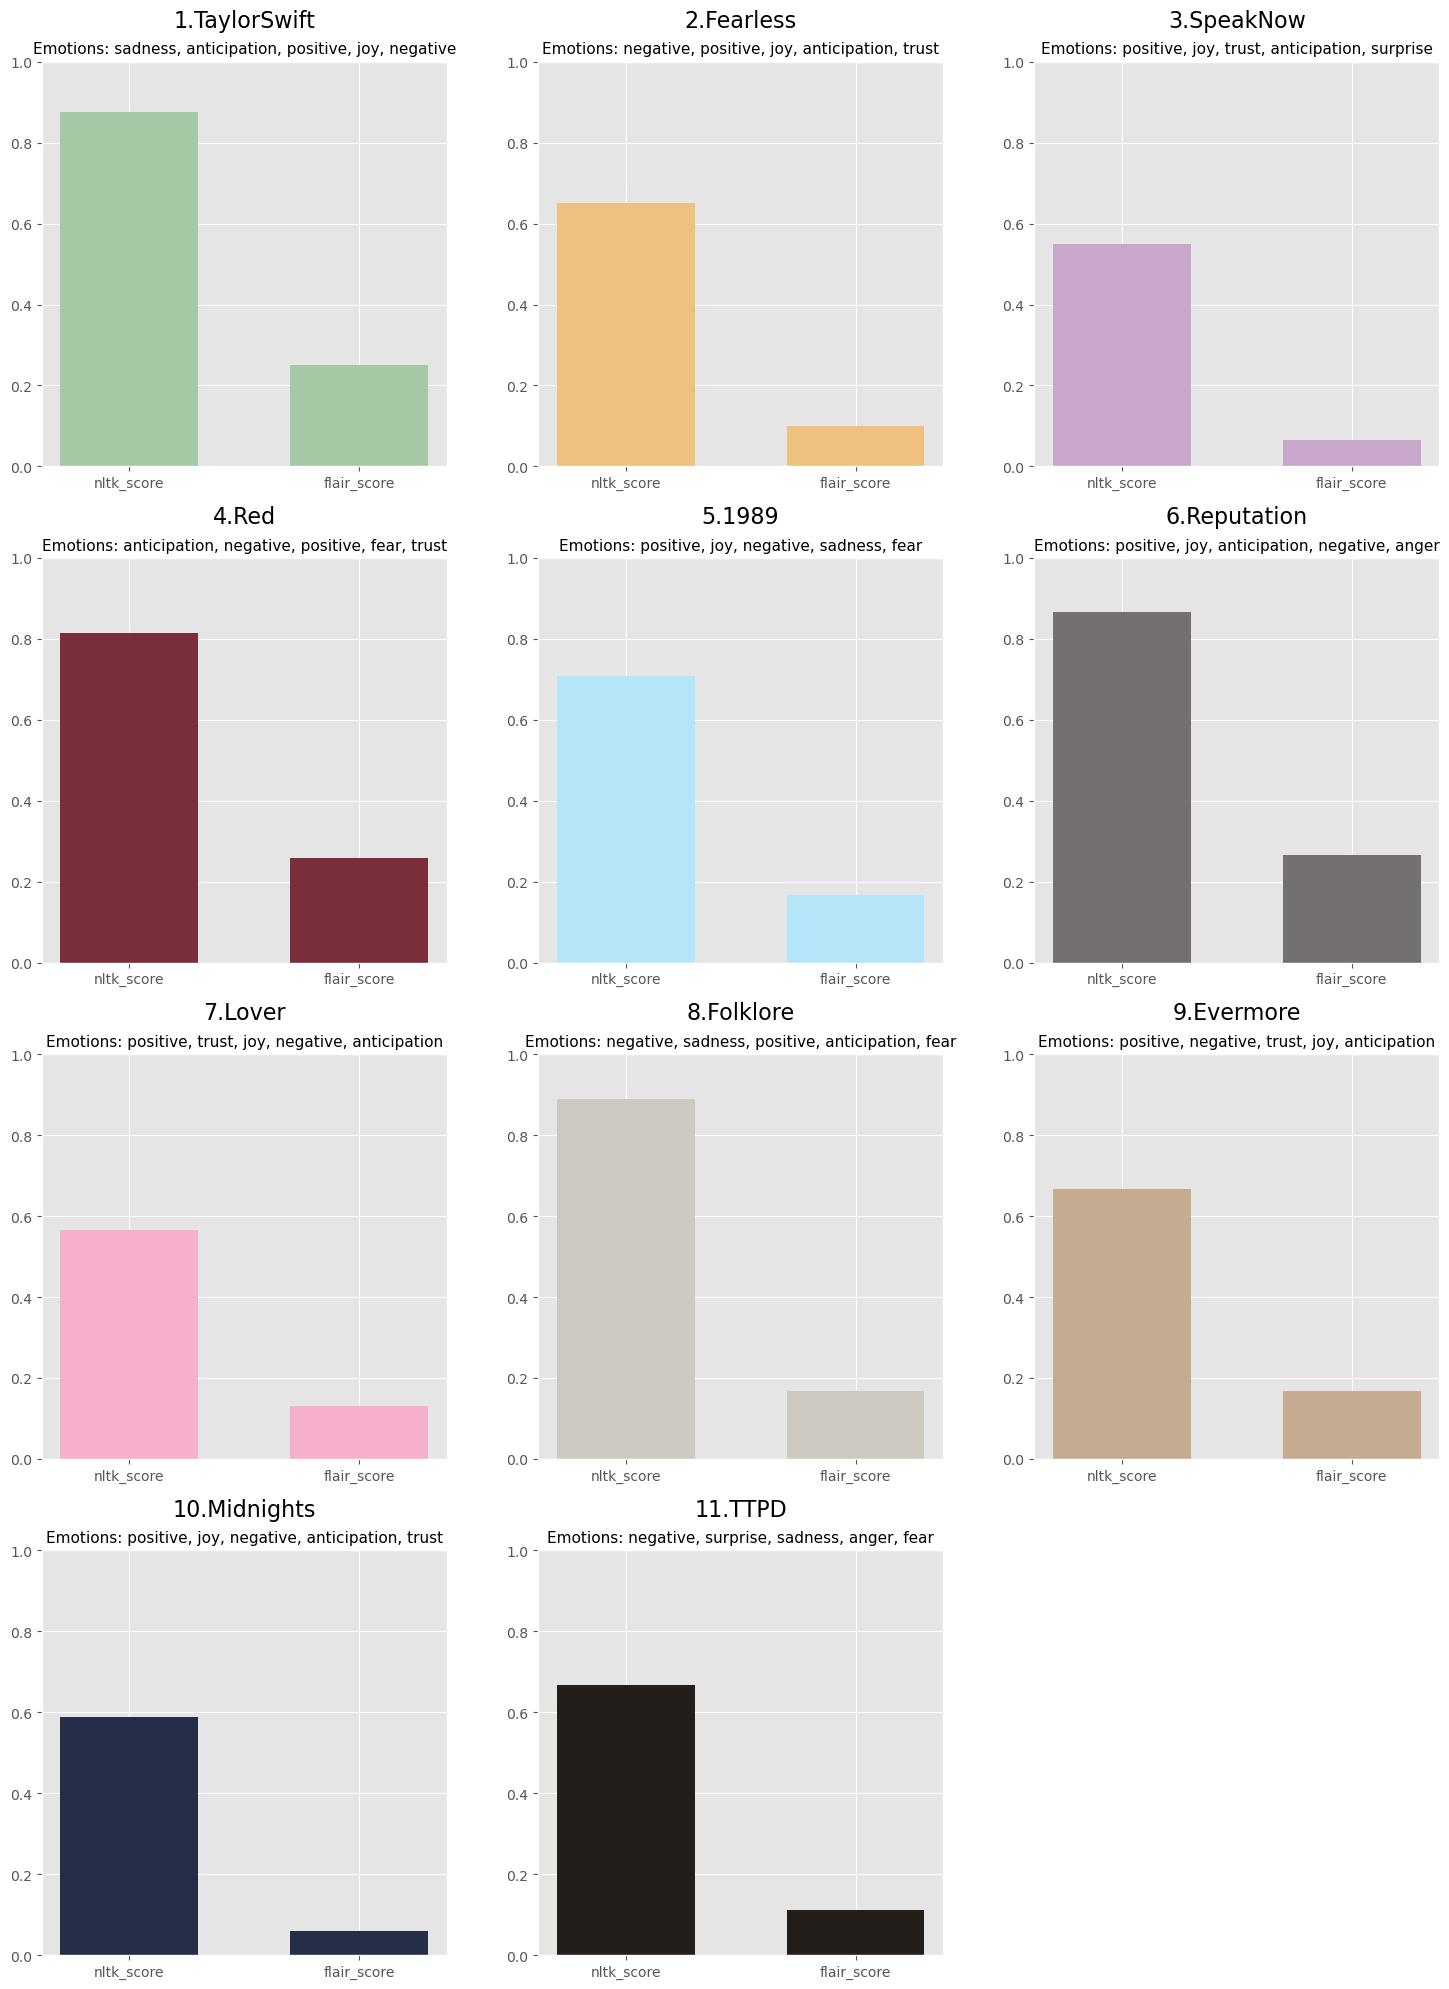

In [27]:
# Dynamically calculates the number of rows we gonna need for 3 x m display
n_rows = (len(full_data) + 2) // 3 
n_cols = 3  # 3 plots per row

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each album on a separate subplot
for i, (index, row) in enumerate(full_data.iterrows()):
    # Bar plot for the scores
    bars = axes[i].bar([1, 2], [row['nltk_score'], row['flair_score']], color=[album_colors[i]], width=0.6)
    
    # Set X-axis labels
    axes[i].set_xticks([1, 2])
    axes[i].set_xticklabels(['nltk_score', 'flair_score'])

    #Set the lim on Y-axis 
    #so all results are in the same range
    axes[i].set_ylim(0,1)
    
    # Set title as Album Name
    axes[i].set_title(row['album'], fontsize=16, loc='center', pad=25)
    
    # Set subtitle as Emotions
    axes[i].text(0.5, 1.05, f"Emotions: {', '.join(row['ncrlex_emotions'])}", transform=axes[i].transAxes,
                 fontsize=11, color='black', ha='center', va='top') 
    

# Remove any empty subplots
# In this example this will delete the last ( 12th ) plot because we won't need it.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to ensure no overlap
plt.tight_layout()
plt.savefig(f'../data/images/album-analysis.jpeg')
plt.show()


### Influential Words

In [28]:
album_trends.groupby('album').max().reset_index()

,album,word,score
0,1.TaylorSwift,who,0.442570
1,10.Midnights,wanted,0.568574
2,11.TTPD,tree,0.363131
3,2.Fearless,way,0.367259
4,3.SpeakNow,wonderstruck,0.364542
5,4.Red,wish,0.545342
6,5.1989,way,0.269428
7,6.Reputation,world,0.574592
8,7.Lover,weekend,0.575887
9,8.Folklore,without,0.354263


In [29]:
# Group by album and get the top 5 words for each album
top_words_per_album = album_trends.groupby('album').apply(
    lambda x: x.nlargest(10, 'score')).reset_index(drop=True).sort_values(
    by='album', key= lambda x: x.apply(lambda s: int(re.search(r"(\d+)\.", s).group(1)))).reset_index()

In [30]:
# Plotting
albums = top_words_per_album['album'].unique()
n_albums = len(albums)

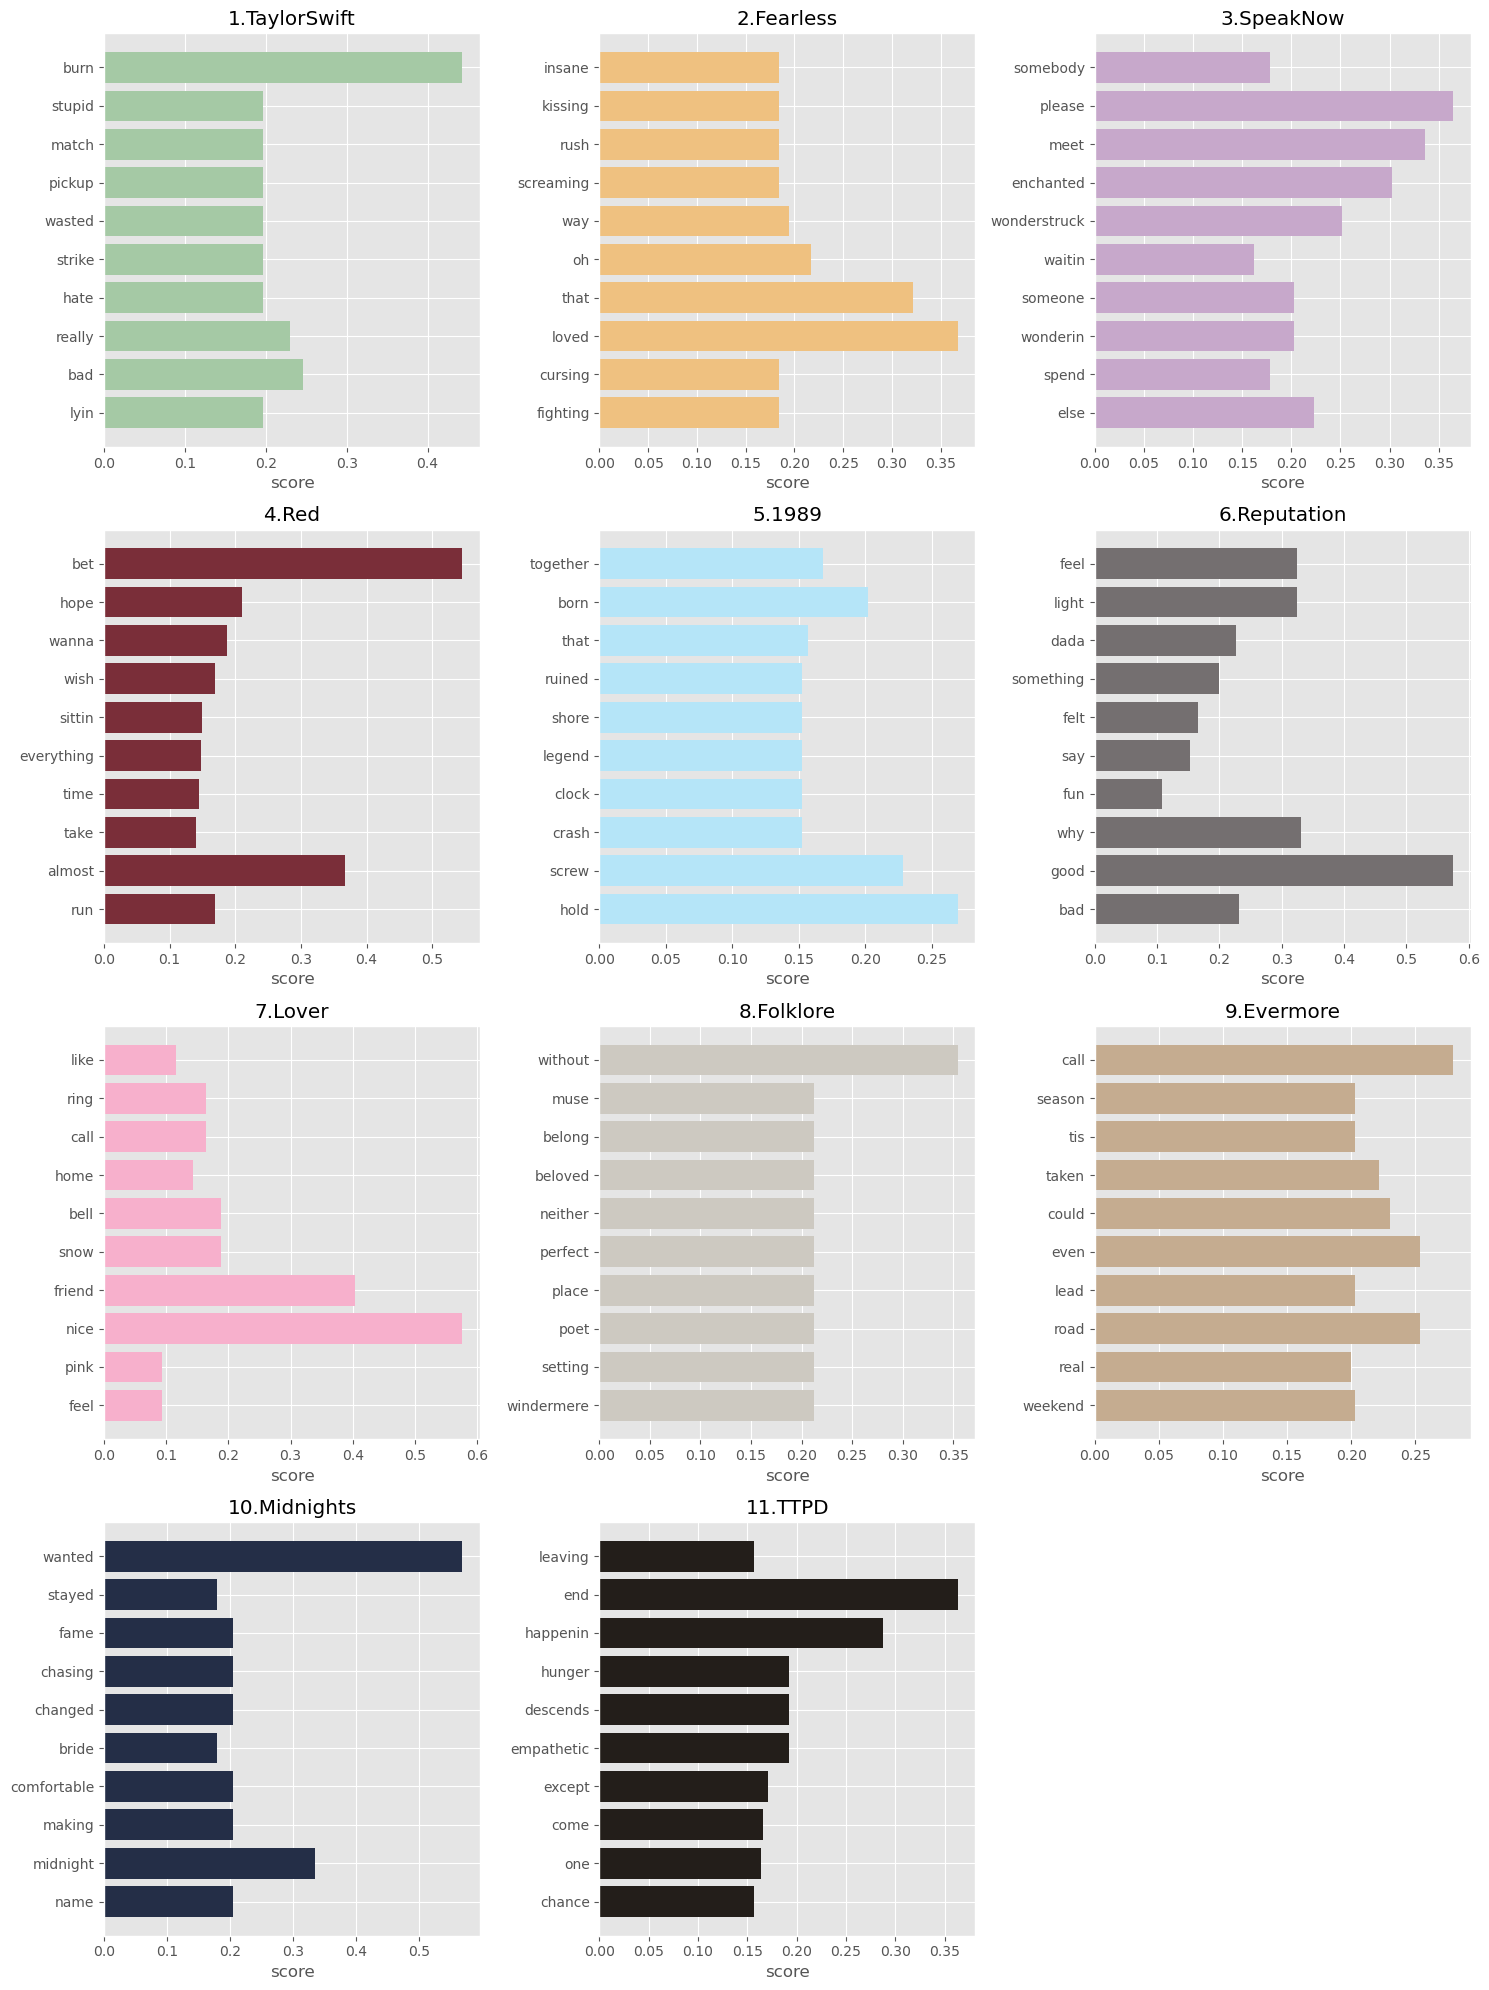

In [31]:
# Define the number of rows and columns for subplots (3 plots per row)
n_cols = 3
n_rows = (n_albums + n_cols - 1) // n_cols  # Round up to ensure all albums fit

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easy iteration if n_albums < n_rows * n_cols
axes = axes.flatten()

# Plot top words for each album
for i, album in enumerate(albums):
    album_data = top_words_per_album[top_words_per_album['album'] == album]
    
    axes[i].barh(album_data['word'], album_data['score'], color=album_colors[i])
    axes[i].set_title(album)
    axes[i].invert_yaxis()  # Invert y-axis to have the top score at the top
    axes[i].set_xlabel('score')
    
# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to ensure no overlap
plt.tight_layout()

#Save the image
plt.savefig('../data/images/album-thematics')

# Show the plot
plt.show()